<a href="https://colab.research.google.com/github/jarora-dev/DL-Image-Caption-Generator/blob/main/Image_Captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Caption Generator using CNN and LSTM
We are using the Flickr Dataset


# 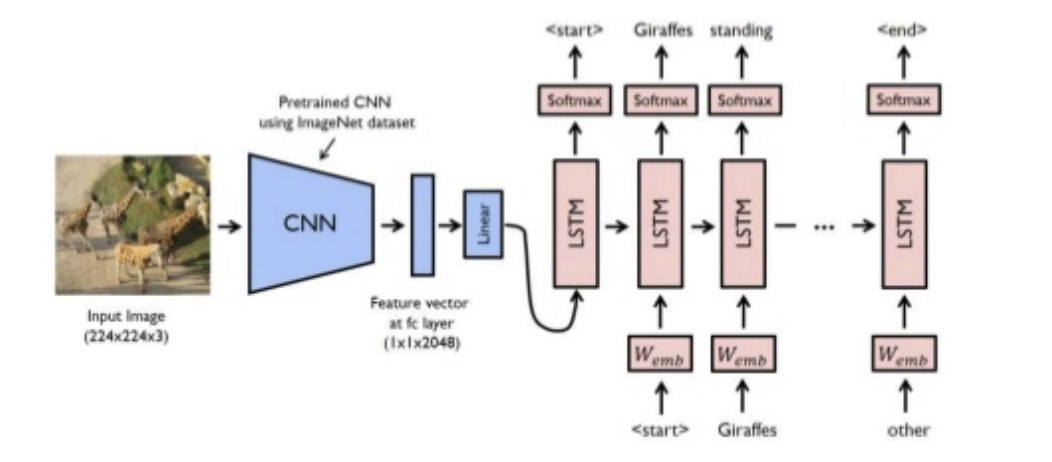

# Import Libraries


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from google.colab import drive

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add 

In [2]:
# Mounting Google Drive

drive.mount('/content/drive')
DATASET_DIR = '/content/drive/MyDrive/Machine Learning Projects/Image Caption Generator/Dataset/Flickr8k'
WORKING_DIR = '/content/drive/MyDrive/Machine Learning Projects/Image Caption Generator/Working Directory/Flickr8k'

Mounted at /content/drive


# Extracting Image Features using VGG16



In [ ]:
# Load VGG16 Model 
model = VGG16()

#Restructure the model
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

#print model summary
print(model.summary())

553467096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
# extracting features from images

features = {}
directory  = os.path.join(DATASET_DIR,'Images')

for img_name in tqdm(os.listdir(directory)):
  img_path = directory + "/" + img_name
  image = load_img(img_path, target_size=(224,224))
  # convert image to numpy array
  image = img_to_array(image)
  #reshape data to model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  #preprocess the image for VGG16 Model
  image = preprocess_input(image)
  #extract features
  feature = model. predict(image, verbose=0)
  #get image ID
  img_id = img_name.split('.')[0]
  #store feature
  features[img_id] = feature


  0%|          | 0/8091 [00:00<?, ?it/s]

In [ ]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'),'wb'))

In [3]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
  features = pickle.load(f)

# Load Captions

In [4]:
with open(os.path.join(DATASET_DIR, 'captions.txt'), 'r') as f:
  next(f)
  caption_doc = f.read()

In [11]:
# create mapping of image captions
mapping = {}

for line in tqdm(caption_doc.split('\n')):
  if len(line)<3:
    continue
  tokens = line.split(',')
  image_id, caption = tokens[0],tokens[1:]
  image_id = image_id.split('.')[0]
  caption = " ".join(caption)

  if image_id not in mapping:
    mapping[image_id] = []
  mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [12]:
mapping

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi